<a href="https://colab.research.google.com/github/rambabulukalapu/Prediction-of-material-selection-using-AIML/blob/main/tool_wear_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Install Required Libraries
!pip install pandas scikit-learn matplotlib seaborn

In [2]:
# STEP 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# STEP 3: Load Dataset
url = "UPLOAD-YOUR-FILE-OR-USE-GITHUB-RAW-LINK"
df = pd.read_csv('tool_wear_dataset_1000 (1).csv')

In [7]:
# STEP 4: Encode Target Column
le = LabelEncoder()
df["wear_level"] = le.fit_transform(df["wear_level"])  # Good=0, Moderate=1, Worn=2


In [8]:
# STEP 5: Split Data
X = df.drop("wear_level", axis=1)
y = df["wear_level"]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# STEP 6: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# STEP 7: Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00        17
    Moderate       1.00      1.00      1.00        89
        Worn       1.00      1.00      1.00        94

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



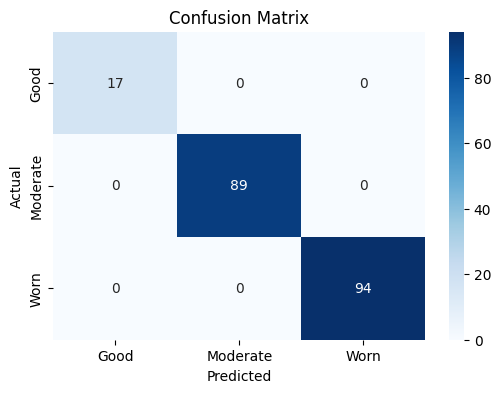

In [13]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
# STEP 8: Predict on New Data
sample = [[0.75, 85.0, 0.55, 210]]  # vibration, temp, acoustic, cutting_fo
sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)
print("Predicted Wear Level:", le.inverse_transform(pred)[0])

Predicted Wear Level: Moderate


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
